# Understanding Covid19 Case Counts using machine learning

In [1]:
# used library imports
import pandas as pd

### Covid Data from Our World in Data

Last downloaded: 16th of May 2024

https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv

In [2]:
df = pd.read_csv('resources/owid-covid-data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397677 entries, 0 to 397676
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    397677 non-null  object 
 1   continent                                   378618 non-null  object 
 2   location                                    397677 non-null  object 
 3   date                                        397677 non-null  object 
 4   total_cases                                 358581 non-null  float64
 5   new_cases                                   386444 non-null  float64
 6   new_cases_smoothed                          385214 non-null  float64
 7   total_deaths                                336105 non-null  float64
 8   new_deaths                                  386794 non-null  float64
 9   new_deaths_smoothed                         385564 non-null  float64
 

### Inspecting the Data

Findings from a first look at the data:
- need to decide wether to use smoothed variables or not, can't use both
- total tests probably redundant
- total vaccinations are redundant if we have people vaccinated, fully vaccinated and boosters
- some columns have high numbers of missing values, like handwashing_facilities and smokers
- for icu and hospital patients, per million might be better, due to comparability



In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397672,ZWE,Africa,Zimbabwe,2024-04-24,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
397673,ZWE,Africa,Zimbabwe,2024-04-25,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
397674,ZWE,Africa,Zimbabwe,2024-04-26,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
397675,ZWE,Africa,Zimbabwe,2024-04-27,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,3.585810e+05,3.864440e+05,3.852140e+05,3.361050e+05,386794.000000,385564.000000,358581.000000,386444.000000,385214.000000,336105.000000,...,228740.000000,151351.000000,272868.000000,366406.000000,299646.000000,3.976770e+05,1.327600e+04,13276.000000,13276.000000,13276.000000
mean,7.560483e+06,8.503695e+03,8.530716e+03,9.096952e+04,76.169995,76.409550,115014.660831,129.532618,129.933273,929.946747,...,32.910900,50.790431,3.097428,73.710804,0.722574,1.293155e+08,5.565216e+04,9.762172,10.986410,1778.714099
std,4.476474e+07,2.365363e+05,8.919575e+04,4.608855e+05,1405.682671,527.419277,162125.095103,1526.641288,565.267399,1139.151038,...,13.572257,31.952834,2.548117,7.394839,0.149003,6.635272e+08,1.554990e+05,11.990399,24.514719,1989.522648
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,9.631000e+03,0.000000e+00,0.000000e+00,1.380000e+02,0.000000,0.000000,3040.311000,0.000000,0.000000,66.820000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,1.776251e+02,2.120000,-1.460000,122.933152
50%,8.158100e+04,0.000000e+00,1.557100e+01,1.407000e+03,0.000000,0.000000,33973.672000,0.000000,3.801000,433.799000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,6.806349e+03,8.150000,5.725000,1259.300400
75%,9.021610e+05,0.000000e+00,3.748570e+02,1.275300e+04,0.000000,3.714000,157521.073000,0.000000,64.734000,1493.483000,...,41.300000,82.502000,4.200000,79.460000,0.829000,2.830170e+07,3.894165e+04,15.022500,15.680000,2880.678125
max,7.753798e+08,4.423623e+07,6.319461e+06,7.047396e+06,103719.000000,14817.000000,770966.075000,240325.866000,34332.267000,6485.570000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.345330e+06,78.080000,377.830000,10293.515000


Selecting a subset of columns that can be used for predictions

In [5]:
df_subset = df[['continent','location','date','new_cases_per_million','new_deaths_per_million','reproduction_rate','icu_patients_per_million','hosp_patients_per_million','new_tests_per_thousand','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred','stringency_index','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','hospital_beds_per_thousand','life_expectancy','human_development_index',]]
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397677 entries, 0 to 397676
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   continent                            378618 non-null  object 
 1   location                             397677 non-null  object 
 2   date                                 397677 non-null  object 
 3   new_cases_per_million                386444 non-null  float64
 4   new_deaths_per_million               386794 non-null  float64
 5   reproduction_rate                    184817 non-null  float64
 6   icu_patients_per_million             38837 non-null   float64
 7   hosp_patients_per_million            40377 non-null   float64
 8   new_tests_per_thousand               75403 non-null   float64
 9   people_vaccinated_per_hundred        79959 non-null   float64
 10  people_fully_vaccinated_per_hundred  76865 non-null   float64
 11  total_booster

In [6]:
df_subset.isnull().sum()

continent                               19059
location                                    0
date                                        0
new_cases_per_million                   11233
new_deaths_per_million                  10883
reproduction_rate                      212860
icu_patients_per_million               358840
hosp_patients_per_million              357300
new_tests_per_thousand                 322274
people_vaccinated_per_hundred          317718
people_fully_vaccinated_per_hundred    320812
total_boosters_per_hundred             345300
stringency_index                       200385
population_density                      59412
median_age                              83279
aged_65_older                           94084
aged_70_older                           86431
gdp_per_capita                          89356
cardiovasc_death_rate                   88789
diabetes_prevalence                     72815
female_smokers                         165785
male_smokers                      

In [7]:
df_subset.describe()

,new_cases_per_million,new_deaths_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,new_tests_per_thousand,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,stringency_index,...,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
count,386444.000000,386794.000000,184817.000000,38837.000000,40377.000000,75403.000000,79959.000000,76865.000000,52377.000000,197292.000000,...,303593.000000,311246.000000,308321.000000,308888.000000,324862.000000,231892.000000,228740.000000,272868.000000,366406.000000,299646.000000
mean,129.532618,0.806203,0.911495,15.767063,126.813391,3.272466,53.204774,48.368835,36.023039,42.791492,...,8.703831,5.500781,18961.090464,264.360275,8.560196,10.795876,32.910900,3.097428,73.710804,0.722574
std,1526.641288,7.211076,0.399925,22.829584,151.347732,9.033843,29.480966,29.139236,30.397027,24.867260,...,6.097274,4.138575,19875.492581,120.886118,4.940448,10.781817,13.572257,2.548117,7.394839,0.149003
min,0.000000,0.000000,-0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.144000,0.526000,661.240000,79.370000,0.990000,0.100000,7.700000,0.100000,53.280000,0.394000
25%,0.000000,0.000000,0.720000,2.378000,32.016000,0.286000,27.260000,20.860000,5.760000,22.220000,...,3.526000,2.085000,3823.194000,175.695000,5.350000,1.900000,22.600000,1.300000,69.590000,0.602000
50%,0.000000,0.000000,0.950000,6.527000,74.968000,0.971000,63.990000,57.080000,35.310000,42.590000,...,6.378000,3.871000,12294.876000,245.465000,7.200000,6.300000,33.100000,2.500000,75.050000,0.740000
75%,0.000000,0.000000,1.140000,18.973000,160.568000,2.914000,77.745000,73.600000,57.700000,62.040000,...,13.928000,8.643000,27216.445000,333.436000,10.790000,19.300000,41.300000,4.200000,79.460000,0.829000
max,240325.866000,906.413000,5.870000,180.675000,1526.846000,531.062000,129.070000,126.890000,150.470000,100.000000,...,27.049000,18.493000,116935.600000,724.417000,30.530000,44.000000,78.100000,13.800000,86.750000,0.957000


overall there are a lot of null values especially for vaccinations, so we need to check if that's because some countries just don't report vaccinations, or if those values are all from a time where there were no vaccinations, also if there are gaps in the reports, so fill them with 0 till the first vaccination and then last observation carried forward

In [8]:
df_subset['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [9]:
df_cleaned = df_subset.dropna(subset=['continent'])
df_cleaned.loc[:, 'new_cases_per_million']= df_cleaned['new_cases_per_million'].fillna(0)
df_cleaned.loc[:, 'new_deaths_per_million']= df_cleaned['new_deaths_per_million'].fillna(0)
df_cleaned.loc[:, 'reproduction_rate']= df_cleaned['reproduction_rate'].fillna(0)
df_cleaned.loc[:, 'icu_patients_per_million']= df_cleaned['icu_patients_per_million'].fillna(0)
df_cleaned.loc[:, 'hosp_patients_per_million']= df_cleaned['hosp_patients_per_million'].fillna(0)
df_cleaned.loc[:, 'new_tests_per_thousand']= df_cleaned['new_tests_per_thousand'].fillna(0)
df_cleaned.loc[:, 'stringency_index']= df_cleaned['new_tests_per_thousand'].fillna(0)

df_cleaned

,continent,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,new_tests_per_thousand,people_vaccinated_per_hundred,...,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511
1,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511
2,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511
3,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511
4,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397672,Africa,Zimbabwe,2024-04-24,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
397673,Africa,Zimbabwe,2024-04-25,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
397674,Africa,Zimbabwe,2024-04-26,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
397675,Africa,Zimbabwe,2024-04-27,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571


In [10]:
#sort by 'location' and 'date'
df_cleaned = df_cleaned.sort_values(by=['location', 'date'])

# Use groupby on 'location' and apply forward fill
df_cleaned['people_vaccinated_per_hundred'] = df_cleaned.groupby('location')['people_vaccinated_per_hundred'].ffill()
df_cleaned['people_fully_vaccinated_per_hundred'] = df_cleaned.groupby('location')['people_fully_vaccinated_per_hundred'].ffill()
df_cleaned['total_boosters_per_hundred'] = df_cleaned.groupby('location')['total_boosters_per_hundred'].ffill()

#fill the rest of values with 0 (those are values before the first value, therefore they are 0)
df_cleaned.loc[:, 'people_vaccinated_per_hundred']= df_cleaned['people_vaccinated_per_hundred'].fillna(0)
df_cleaned.loc[:, 'people_fully_vaccinated_per_hundred']= df_cleaned['people_fully_vaccinated_per_hundred'].fillna(0)
df_cleaned.loc[:, 'total_boosters_per_hundred']= df_cleaned['total_boosters_per_hundred'].fillna(0)

df_cleaned

,continent,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,new_tests_per_thousand,people_vaccinated_per_hundred,...,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511
1,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511
2,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511
3,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511
4,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,2.581,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397672,Africa,Zimbabwe,2024-04-24,0.0,0.0,0.0,0.0,0.0,0.0,39.45,...,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
397673,Africa,Zimbabwe,2024-04-25,0.0,0.0,0.0,0.0,0.0,0.0,39.45,...,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
397674,Africa,Zimbabwe,2024-04-26,0.0,0.0,0.0,0.0,0.0,0.0,39.45,...,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
397675,Africa,Zimbabwe,2024-04-27,0.0,0.0,0.0,0.0,0.0,0.0,39.45,...,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571


In [11]:
#df_cleaned[df_cleaned['location'] == 'Austria']
#the locations with missing values for population_density are small islands, so we can drop them
print(df_cleaned[df_cleaned['population_density'].isna()]['location'].unique())
df_cleaned.dropna(subset=['population_density'],inplace=True)


['Anguilla' 'Bonaire Sint Eustatius and Saba' 'Cook Islands' 'England'
 'Falkland Islands' 'French Guiana' 'Guadeloupe' 'Guernsey' 'Jersey'
 'Martinique' 'Mayotte' 'Montserrat' 'Niue' 'Northern Cyprus'
 'Northern Ireland' 'Pitcairn' 'Reunion' 'Saint Barthelemy' 'Saint Helena'
 'Saint Pierre and Miquelon' 'Scotland' 'South Sudan' 'Syria' 'Taiwan'
 'Tokelau' 'Vatican' 'Wales' 'Wallis and Futuna' 'Western Sahara']


In [12]:
#same for median_age the locations, that have missing values are small islands, so we can drop them
print(df_cleaned[df_cleaned['median_age'].isna()]['location'].unique())
df_cleaned.dropna(subset=['median_age'],inplace=True)

['American Samoa' 'Andorra' 'Bermuda' 'British Virgin Islands'
 'Cayman Islands' 'Dominica' 'Faeroe Islands' 'Gibraltar' 'Greenland'
 'Isle of Man' 'Kosovo' 'Liechtenstein' 'Marshall Islands' 'Monaco'
 'Nauru' 'Northern Mariana Islands' 'Palau' 'Saint Kitts and Nevis'
 'Saint Martin (French part)' 'San Marino' 'Sint Maarten (Dutch part)'
 'Turks and Caicos Islands' 'Tuvalu']


In [13]:
#locations with missing gdp per capita are countries with limited information like, North Korea, Cuba or Somalia, so we drop them
print(df_cleaned[df_cleaned['gdp_per_capita'].isna()]['location'].unique())
df_cleaned.dropna(subset=['gdp_per_capita'],inplace=True)

['Cuba' 'Curacao' 'French Polynesia' 'Guam' 'New Caledonia' 'North Korea'
 'Somalia' 'United States Virgin Islands']


In [14]:
#only puerto rico has no human development index, so we drop it
print(df_cleaned[df_cleaned['human_development_index'].isna()]['location'].unique())
df_cleaned.dropna(subset=['human_development_index'],inplace=True)

['Aruba' 'Macao' 'Puerto Rico']


In [15]:
#missing values for 70 or older are assumed to be null
df_cleaned['aged_70_older'].fillna(0, inplace=True)
#same for cardiovasc_death_rate
df_cleaned.dropna(subset=['cardiovasc_death_rate'],inplace=True)
#smokers are filled with the median value (they are also mainly small 3rd world countries, so maybe should be dropped)
# Calculate the median of 'female_smokers' and 'male_smokers'
female_smokers_median = df_cleaned['female_smokers'].median()
male_smokers_median = df_cleaned['male_smokers'].median()

# Fill the missing values with the calculated median
df_cleaned['female_smokers'].fillna(female_smokers_median, inplace=True)
df_cleaned['male_smokers'].fillna(male_smokers_median, inplace=True)

#hospital beds are also small countries or poor countries, so we assume 0 
df_cleaned['hospital_beds_per_thousand'].fillna(0, inplace=True)
#only puerto rico has no human development index, so we drop it
df_cleaned.dropna(subset=['human_development_index'],inplace=True)

#df_cleaned.to_csv('resources/covid_data_cleaned.csv')
df_cleaned

,continent,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,new_tests_per_thousand,people_vaccinated_per_hundred,...,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,2.581,1.337,1803.987,597.029,9.59,6.2,31.4,0.5,64.83,0.511
1,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,2.581,1.337,1803.987,597.029,9.59,6.2,31.4,0.5,64.83,0.511
2,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,2.581,1.337,1803.987,597.029,9.59,6.2,31.4,0.5,64.83,0.511
3,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,2.581,1.337,1803.987,597.029,9.59,6.2,31.4,0.5,64.83,0.511
4,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,2.581,1.337,1803.987,597.029,9.59,6.2,31.4,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397672,Africa,Zimbabwe,2024-04-24,0.0,0.0,0.0,0.0,0.0,0.0,39.45,...,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
397673,Africa,Zimbabwe,2024-04-25,0.0,0.0,0.0,0.0,0.0,0.0,39.45,...,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
397674,Africa,Zimbabwe,2024-04-26,0.0,0.0,0.0,0.0,0.0,0.0,39.45,...,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571
397675,Africa,Zimbabwe,2024-04-27,0.0,0.0,0.0,0.0,0.0,0.0,39.45,...,2.822,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571


In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282307 entries, 0 to 397676
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   continent                            282307 non-null  object 
 1   location                             282307 non-null  object 
 2   date                                 282307 non-null  object 
 3   new_cases_per_million                282307 non-null  float64
 4   new_deaths_per_million               282307 non-null  float64
 5   reproduction_rate                    282307 non-null  float64
 6   icu_patients_per_million             282307 non-null  float64
 7   hosp_patients_per_million            282307 non-null  float64
 8   new_tests_per_thousand               282307 non-null  float64
 9   people_vaccinated_per_hundred        282307 non-null  float64
 10  people_fully_vaccinated_per_hundred  282307 non-null  float64
 11  total_boosters_per

convert date to datetime

In [17]:
df_cleaned['data'] = pd.to_datetime(df_cleaned['date'])

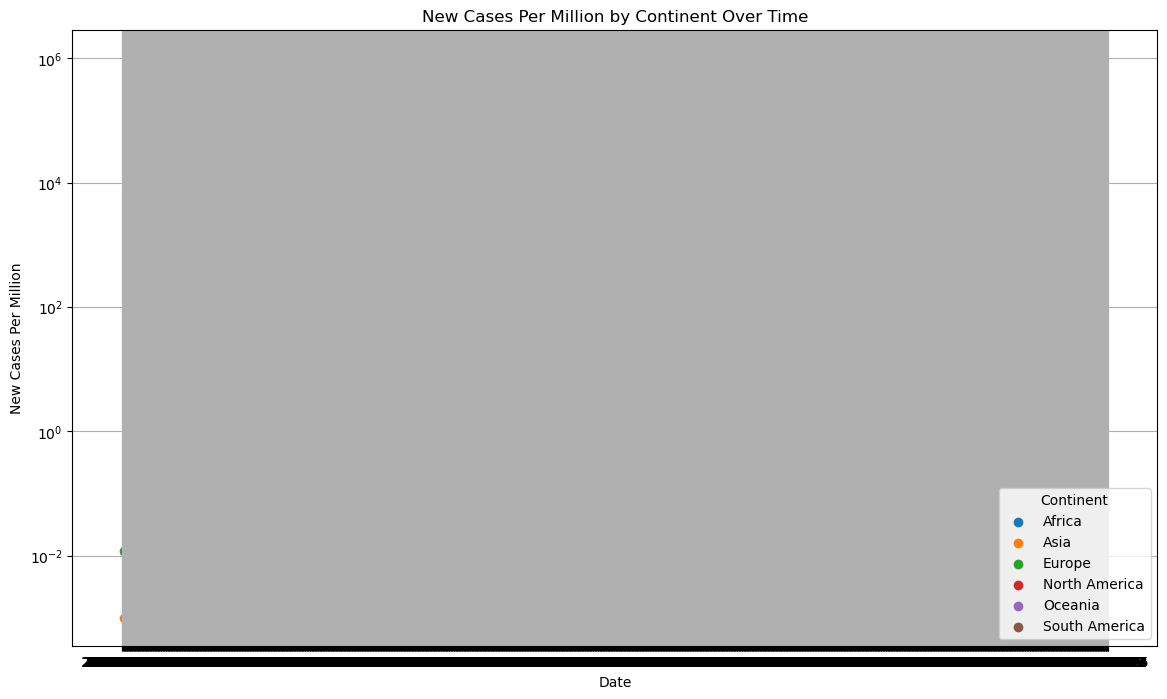

In [24]:
import matplotlib.pyplot as plt
# Group by date and continent, then sum the new_cases_per_million
grouped_df = df.groupby(['date', 'continent']).agg({
    'new_cases_per_million': 'sum',
    'new_deaths_per_million': 'sum'
}).reset_index()

# Pivot the table for easier plotting
pivot_df = grouped_df.pivot(index='date', columns='continent', values='new_cases_per_million')

pivot_df.fillna(0, inplace=True)

# Pivot the table for easier plotting
#pivot_df = grouped_df.pivot(index='date', columns='continent', values='new_cases_per_million')

plt.figure(figsize=(14, 8))
plt.yscale('log')

# Clear any potential background settings
plt.gca().set_facecolor('white')

# Assuming 'pivot_df' is a DataFrame with dates as the index and continents as columns
for continent in pivot_df.columns:
    plt.scatter(pivot_df.index, pivot_df[continent], label=continent)

plt.title('New Cases Per Million by Continent Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases Per Million')
plt.legend(title='Continent')
plt.grid(True)
plt.show()

# import plotly.express as px
# 
# # Create the plot using plotly
# fig = px.line(grouped_df, x='date', y='new_cases_per_million', color='continent',
#               title='New Cases Per Million by Continent Over Time',
#               labels={'new_cases_per_million': 'New Cases Per Million', 'date': 'Date', 'continent': 'Continent'}
#               )
# 
# # Update layout to set the size
# fig.update_layout(
#     width=1000,  # set the width here
#     height=600   # set the height here
# )
# 
# # Show the plot
# fig.show()

In [32]:
import plotly.express as px

fig = px.scatter(grouped_df, x='date', y='new_cases_per_million', color='continent',
              title='New Cases Per Million by Continent Over Time',
                 log_y=True)

# Update layout to set the size
fig.update_layout(
    width=1000,  # set the width here
    height=600, # set the height here
)
fig.show()

In [20]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# Apply the linear regression for each continent and calculate R² values
r2_values = {}

# Apply the linear regression for each continent
for continent in grouped_df['continent'].unique():
    df_continent = grouped_df[grouped_df['continent'] == continent]
    model = LinearRegression()
    x = df_continent['new_cases_per_million'].values.reshape(-1, 1)
    y = df_continent['new_deaths_per_million'].values
    model.fit(x, y)
    predictions = model.predict(x)
    grouped_df.loc[grouped_df['continent'] == continent, f'{continent}_trendline'] = predictions
    r2_values[continent] = model.score(x, y)


# Print the R² values
for continent, r2 in r2_values.items():
    print(f"R² for {continent}: {r2:.2f}")
    
# Create scatter plot with trendlines using plotly
fig = px.scatter(grouped_df, x='new_cases_per_million', y='new_deaths_per_million', color='continent',
                 title='New Cases vs. New Deaths Per Million with Trendlines')

# Add trendlines to the scatter plot with the same colors as the dots
for continent in grouped_df['continent'].unique():
    continent_color = px.colors.qualitative.Plotly[grouped_df['continent'].unique().tolist().index(continent)]
    fig.add_trace(go.Scatter(x=grouped_df[grouped_df['continent'] == continent]['new_cases_per_million'],
                             y=grouped_df[grouped_df['continent'] == continent][f'{continent}_trendline'],
                             mode='lines', name=f'{continent} Trendline', line=dict(color=continent_color)))

# Update layout to set the size
fig.update_layout(
    width=1000,  # set the width here
    height=600   # set the height here
)

# Show the plot
fig.show()

R² for North America: 0.36
R² for South America: 0.20
R² for Asia: 0.39
R² for Africa: 0.24
R² for Europe: 0.39
R² for Oceania: 0.27


In [21]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import numpy as np

# Summing up both new cases per million and stringency index by date and continent
grouped_df = df_cleaned.groupby(['date', 'continent']).agg({
    'new_cases_per_million': 'sum',
    'stringency_index': 'mean'
}).reset_index()

# Apply the linear regression for each continent
for continent in grouped_df['continent'].unique():
    df_continent = grouped_df[grouped_df['continent'] == continent]
    model = LinearRegression()
    x = df_continent['new_cases_per_million'].values.reshape(-1, 1)
    y = df_continent['stringency_index'].values
    model.fit(x, y)
    predictions = model.predict(x)
    grouped_df.loc[grouped_df['continent'] == continent, f'{continent}_trendline'] = predictions

# Print the R² values
for continent in grouped_df['continent'].unique():
    df_continent = grouped_df[grouped_df['continent'] == continent]
    x = df_continent['new_cases_per_million'].values.reshape(-1, 1)
    y = df_continent['stringency_index'].values
    model.fit(x, y)
    r2 = model.score(x, y)
    print(f"R² for {continent}: {r2:.2f}")

# Create scatter plot with trendlines using plotly
fig = px.scatter(grouped_df, x='new_cases_per_million', y='stringency_index', color='continent',
                 title='New Cases Per Million vs. Stringency Index with Trendlines')

# Add trendlines to the scatter plot with the same colors as the dots
for continent in grouped_df['continent'].unique():
    continent_color = px.colors.qualitative.Plotly[grouped_df['continent'].unique().tolist().index(continent)]
    fig.add_trace(go.Scatter(x=grouped_df[grouped_df['continent'] == continent]['new_cases_per_million'],
                             y=grouped_df[grouped_df['continent'] == continent][f'{continent}_trendline'],
                             mode='lines', name=f'{continent} Trendline', line=dict(color=continent_color)))

# Update layout to set the size
fig.update_layout(
    width=1000,  # set the width here
    height=600   # set the height here
)

# Show the plot
fig.show()

R² for North America: 0.01
R² for South America: 0.04
R² for Asia: 0.03
R² for Africa: 0.05
R² for Europe: 0.01
R² for Oceania: 0.00


confounder selection:
basesd on the pretreatment criterion, the following variables should be controlled for:
- population_density
- median_age
- gdp_per_capita
- life_expectancy
- human_development
- cardiovasc_death_rate
- diabetes_prevalence
- aged_65_older
- aged_70_older
- female_smokers
- male_smokers
based on the disjunctive cause criterion, the following variables should be controlled for:
maybe:
- new_deaths_per_million
proxies for unmeasured confounders:
- maybe use the season as a proxy for unmeasured confounders (like weather, holidays, etc.)

In [22]:
# Function to determine the season
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        # 0 represents winter
        return 0
    elif month in [3, 4, 5]:
        # 1 represents spring
        return 1
    elif month in [6, 7, 8]:
        # 2 represents summer
        return 2
    elif month in [9, 10, 11]:
        # 3 represents fall
        return 3
    
    
# Apply the function to the 'date' column
df_cleaned['season'] = df_cleaned['data'].apply(get_season)

DoubleML to estimate the causal effect of the vaccination rate and stringency on the number of new cases per million

TODO for each continent 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from doubleml import DoubleMLData, DoubleMLPLR

# Load your data
data = df_cleaned

# Define outcome, treatment, and base covariates
outcome = 'new_cases_per_million'
treatments = ['people_fully_vaccinated_per_hundred', 'stringency_index']
base_covariates = ['population_density', 'median_age', 'gdp_per_capita', 'life_expectancy','human_development_index', 'cardiovasc_death_rate', 'diabetes_prevalence', 'aged_65_older', 'aged_70_older','female_smokers','male_smokers','season']

# One-hot encode the continent column
data = pd.get_dummies(data, columns=['continent'], drop_first=True)

# Update covariates to include the one-hot encoded continent columns
covariates = base_covariates + [col for col in data.columns if col.startswith('continent_')]

# Create interaction terms with continent
for treatment in treatments:
    for continent_col in [col for col in data.columns if col.startswith('continent_')]:
        data[f'{treatment}_x_{continent_col}'] = data[treatment] * data[continent_col]

# Update covariates to include the interaction terms
interaction_terms = [f'{treatment}_x_{continent_col}' for treatment in treatments for continent_col in [col for col in data.columns if col.startswith('continent_')]]
covariates += interaction_terms

# Prepare data for DoubleML
dml_data = DoubleMLData(data, y_col=outcome, d_cols=treatments, x_cols=covariates)

# Specify the machine learning models for the nuisance parameters
ml_g = RandomForestRegressor()
ml_m = RandomForestRegressor()

# Initialize the DoubleMLPLR model
dml_plr = DoubleMLPLR(dml_data, ml_g, ml_m)

# Fit the model
dml_plr.fit()

# Print the results
print(dml_plr.summary)


In [ ]:
dml_plr.summary

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from doubleml import DoubleMLData, DoubleMLPLR

# Load your data
data = df_cleaned

# Define outcome, treatment, and base covariates
outcome = 'new_cases_per_million'
treatments = ['people_fully_vaccinated_per_hundred', 'stringency_index']
base_covariates = ['population_density', 'median_age', 'gdp_per_capita', 'life_expectancy','human_development_index', 'cardiovasc_death_rate', 'diabetes_prevalence', 'aged_65_older', 'aged_70_older','female_smokers','male_smokers','season']

# Get unique continents
continents = data['continent'].unique()

# Initialize a dictionary to store results for each continent
results = {}

for continent in continents:
    # Filter data for the current continent
    data_continent = data[data['continent'] == continent].copy()

    # One-hot encode the continent column (although it's redundant here since we filter by one continent at a time)
    data_continent = pd.get_dummies(data_continent, columns=['continent'], drop_first=True)

    # Update covariates to include the one-hot encoded continent columns
    covariates = base_covariates + [col for col in data_continent.columns if col.startswith('continent_')]

    # Create interaction terms with continent
    for treatment in treatments:
        for continent_col in [col for col in data_continent.columns if col.startswith('continent_')]:
            data_continent[f'{treatment}_x_{continent_col}'] = data_continent[treatment] * data_continent[continent_col]

    # Update covariates to include the interaction terms
    interaction_terms = [f'{treatment}_x_{continent_col}' for treatment in treatments for continent_col in [col for col in data_continent.columns if col.startswith('continent_')]]
    covariates += interaction_terms

    # Prepare data for DoubleML
    dml_data = DoubleMLData(data_continent, y_col=outcome, d_cols=treatments, x_cols=covariates)

    # Specify the machine learning models for the nuisance parameters
    ml_g = RandomForestRegressor()
    ml_m = RandomForestRegressor()

    # Initialize the DoubleMLPLR model
    dml_plr = DoubleMLPLR(dml_data, ml_g, ml_m)

    # Fit the model
    dml_plr.fit()

    # Store the results
    results[continent] = dml_plr.summary

# Print the results for each continent
for continent, summary in results.items():
    print(f'Results for {continent}:')
    print(summary)
    print('\n')
